Startegy
--------

Since the data seems to be well distributed, we will use nfold cv for validation and a startified sample from the train set. The startified sample should contain all types of ghosts with 5 samples from each color category.

In [2]:
import xgboost as xgb
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
train_data = pd.read_csv('data/train.csv', low_memory=False)
test_data = pd.read_csv('data/test.csv', low_memory=False)

In [5]:
combined_set = pd.concat([train_data, test_data])

In [183]:
# add the combined var
combined_set['combined_var'] = (combined_set.bone_length * .20) + (combined_set.rotting_flesh * .20) + (combined_set.hair_length * .30) + (combined_set.has_soul * .30)
combined_set['combined_var2'] = (combined_set.bone_length * .30) + (combined_set.has_soul * .70)
combined_set['exp_combined'] = pd.np.exp(combined_set.combined_var)

In [184]:
# Replace categorical variables with numbers
def label_encoding(df, col):
    label_map = { key: float(n) for n, key in enumerate(df[col].unique()) }
    label_reverse_map = { label_map[key]: key for key in label_map }
    df[col] = df[col].apply(lambda x: label_map[x])
    return df, label_map, label_reverse_map

combined_set, _, _ = label_encoding(combined_set, 'color')

In [185]:
train_set = combined_set[:len(train_data.index)]

In [186]:
test_set = combined_set[len(train_data.index):]

In [187]:
len(train_set.index), len(train_data.index), len(test_data.index), len(test_set.index)

(371, 371, 529, 529)

In [188]:
train_set, type_label_map, type_label_reverse_map = label_encoding(train_set, 'type')

/home/jayant/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [169]:
type_label_map

{'Ghost': 2.0, 'Ghoul': 0.0, 'Goblin': 1.0}

In [249]:
train_cols = ['combined_var', 'rotting_flesh', 'combined_var2', 'hair_length']
target_var = 'type'
selected_cols = train_cols + [target_var]

In [250]:
train_set[selected_cols].head()

,combined_var,rotting_flesh,combined_var2,hair_length,type
0,0.515141,0.350839,0.653153,0.465761,0.0
1,0.491676,0.425868,0.480597,0.531401,1.0
2,0.645294,0.354330,0.694220,0.811616,0.0
3,0.713444,0.508723,0.852120,0.636766,0.0
4,0.604905,0.875862,0.615341,0.418594,2.0


In [251]:
dtrain = xgb.DMatrix(train_set[train_cols], feature_names=train_cols, label=train_set[target_var])
dtest = xgb.DMatrix(test_set[train_cols], feature_names=train_cols)

In [252]:
params = {'max_depth':5, 'eta':0.0001, 'silent':1, 'objective':'multi:softmax'}
params['num_class'] = 3
params['seed'] = 7
params['subsample'] = 0.6
params['gamma'] = 10
params['min_child_weight'] = 0.1
params['tree_method'] = 'exact'
params['sketch_eps'] = 0.4

In [228]:
xgb.cv(params, dtrain, nfold=10, num_boost_round=40)

/home/jayant/anaconda3/lib/python3.5/site-packages/xgboost/training.py:272: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  idset = [randidx[(i * kstep): min(len(randidx), (i + 1) * kstep)] for i in range(nfold)]


,test-merror-mean,test-merror-std,train-merror-mean,train-merror-std
0,0.320697,0.081195,0.278823,0.018776
1,0.307254,0.072577,0.267444,0.015657
2,0.309957,0.064114,0.252468,0.015971
3,0.272262,0.064535,0.244084,0.017247
4,0.285775,0.059691,0.247079,0.016007
5,0.291180,0.052743,0.245583,0.015901
6,0.288478,0.055738,0.248276,0.014729
7,0.277667,0.065269,0.248276,0.013640
8,0.277667,0.061821,0.245880,0.011899
9,0.291180,0.066248,0.246481,0.013589


In [229]:
model = xgb.train(params, dtrain, num_boost_round=40)

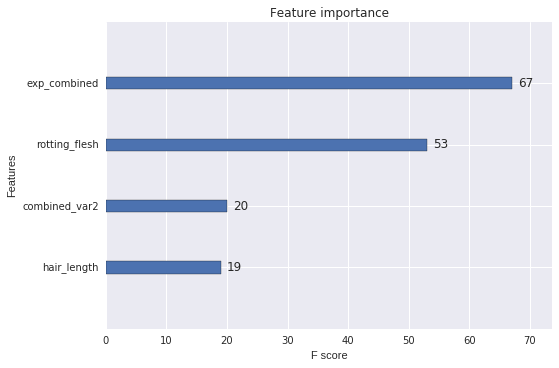

In [230]:
xgb.plot_importance(model)

In [231]:
predictions = model.predict(dtest)

In [232]:
sub = pd.DataFrame({'id': test_set.id, 'type': predictions})
sub['type'] = sub.type.apply(lambda x: type_label_reverse_map[x])

In [233]:
sub.to_csv('submission5_model.csv', index=False)

In [234]:
sub.head()

,id,type
0,3,Ghoul
1,6,Goblin
2,9,Ghoul
3,10,Goblin
4,13,Ghost


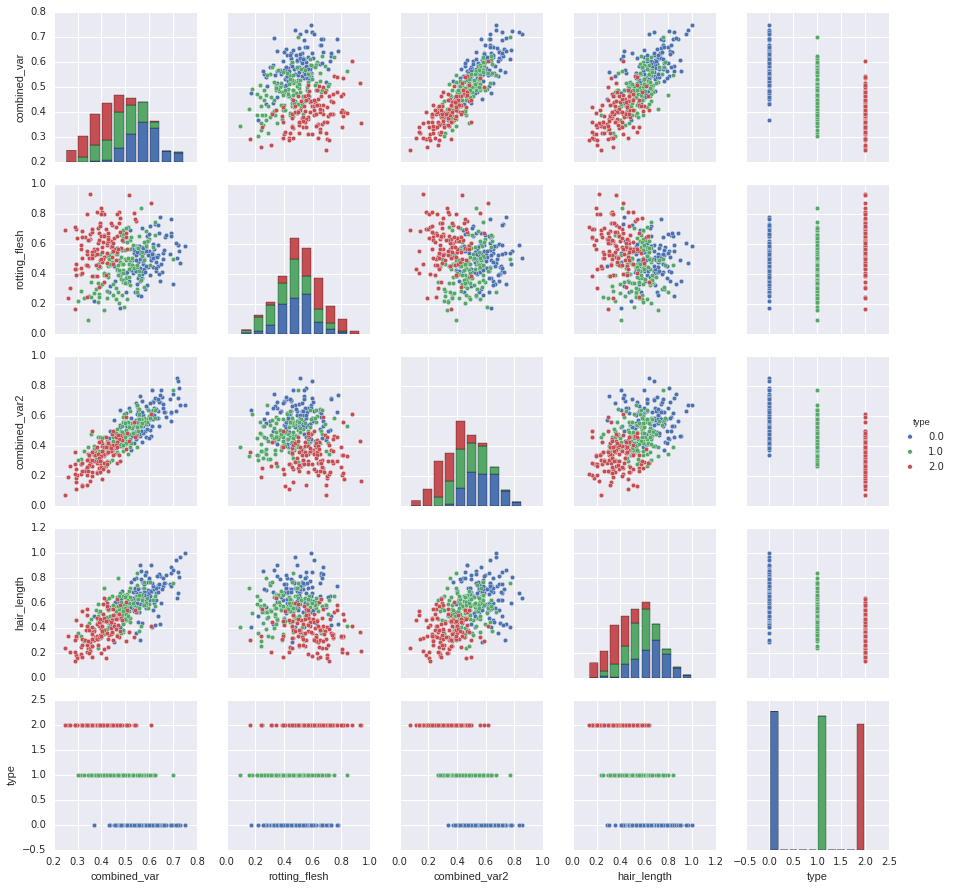

In [253]:
import seaborn as sns
sns.set()

sns.pairplot(train_set[selected_cols], hue='type')

In [254]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [255]:
train, val = train_test_split(train_set[selected_cols], stratify = train_set[target_var])

dtrain_partial = xgb.DMatrix(train[train_cols], feature_names=train_cols, label=train[target_var])
dval = xgb.DMatrix(val[train_cols], feature_names=train_cols, label=val[target_var])

In [256]:
watchlist = [(dval, 'eval'), (dtrain_partial, 'train')]
model_2 = xgb.train(params, dtrain_partial, 60, watchlist)

[0]	eval-merror:0.408602	train-merror:0.266187
[1]	eval-merror:0.387097	train-merror:0.266187
[2]	eval-merror:0.376344	train-merror:0.280576
[3]	eval-merror:0.354839	train-merror:0.284173
[4]	eval-merror:0.333333	train-merror:0.276978
[5]	eval-merror:0.290323	train-merror:0.255396
[6]	eval-merror:0.290323	train-merror:0.255396
[7]	eval-merror:0.258065	train-merror:0.233813
[8]	eval-merror:0.290323	train-merror:0.262590
[9]	eval-merror:0.279570	train-merror:0.251799
[10]	eval-merror:0.301075	train-merror:0.251799
[11]	eval-merror:0.301075	train-merror:0.255396
[12]	eval-merror:0.290323	train-merror:0.251799
[13]	eval-merror:0.301075	train-merror:0.255396
[14]	eval-merror:0.311828	train-merror:0.258993
[15]	eval-merror:0.311828	train-merror:0.258993
[16]	eval-merror:0.301075	train-merror:0.258993
[17]	eval-merror:0.301075	train-merror:0.255396
[18]	eval-merror:0.301075	train-merror:0.255396
[19]	eval-merror:0.311828	train-merror:0.258993
[20]	eval-merror:0.301075	train-merror:0.258993
[2

In [257]:
model_2.predict(dval)

array([ 2.,  2.,  0.,  2.,  1.,  2.,  2.,  2.,  1.,  0.,  1.,  0.,  1.,
        1.,  1.,  2.,  1.,  2.,  2.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  1.,  2.,  1.,  2.,  2.,  1.,  0.,  2.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  0.,  1.,  0.,  0.,  2.,
        1.,  0.,  1.,  0.,  2.,  1.,  0.,  2.,  2.,  0.,  2.,  0.,  2.,
        2.,  2.,  0.,  2.,  1.,  0.,  0.,  0.,  2.,  2.,  0.,  2.,  0.,
        0.,  0.,  2.,  1.,  1.,  1.,  1.,  1.,  0.,  2.,  0.,  0.,  1.,
        1.,  2.], dtype=float32)

In [258]:
print(classification_report(model_2.predict(dval), dval.get_label()))

             precision    recall  f1-score   support

        0.0       0.79      0.79      0.79        33
        1.0       0.55      0.57      0.56        30
        2.0       0.79      0.77      0.78        30

avg / total       0.71      0.71      0.71        93



In [245]:
type_label_map

{'Ghost': 2.0, 'Ghoul': 0.0, 'Goblin': 1.0}

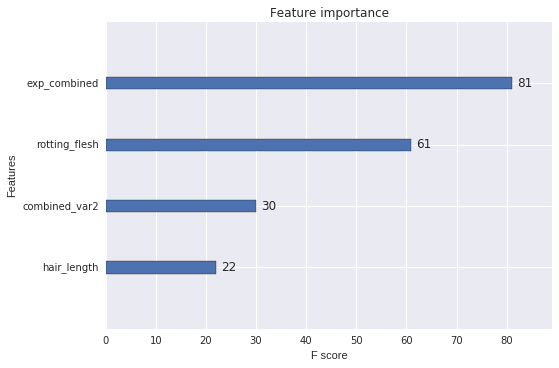

In [246]:
xgb.plot_importance(model_2)

In [226]:
predictions = model_2.predict(dtest)
sub = pd.DataFrame({'id': test_set.id, 'type': predictions})
sub['type'] = sub.type.apply(lambda x: type_label_reverse_map[x])
sub.to_csv('submission5_model2.csv', index=False)